In [ ]:
!nvidia-smi

Thu Jul 11 14:01:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


# Downloading Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WryqhQvc7vdQDrmDolXg")
project = rf.workspace("sign-language-ltoka").project("number-only-self-dataset")
version = project.version(5)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Number-only-self-dataset-5 in yolov8:: 100%|██████████| 2404/2404 [00:00<00:00, 8378.67it/s]


# Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=416 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 258MB/s]
New https://pypi.org/project/ultralytics/8.2.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Number-only-self-dataset-5/data.yaml, epochs=200, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1720706640.663b808260aa.1603.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch10070.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch10071.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch10072.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


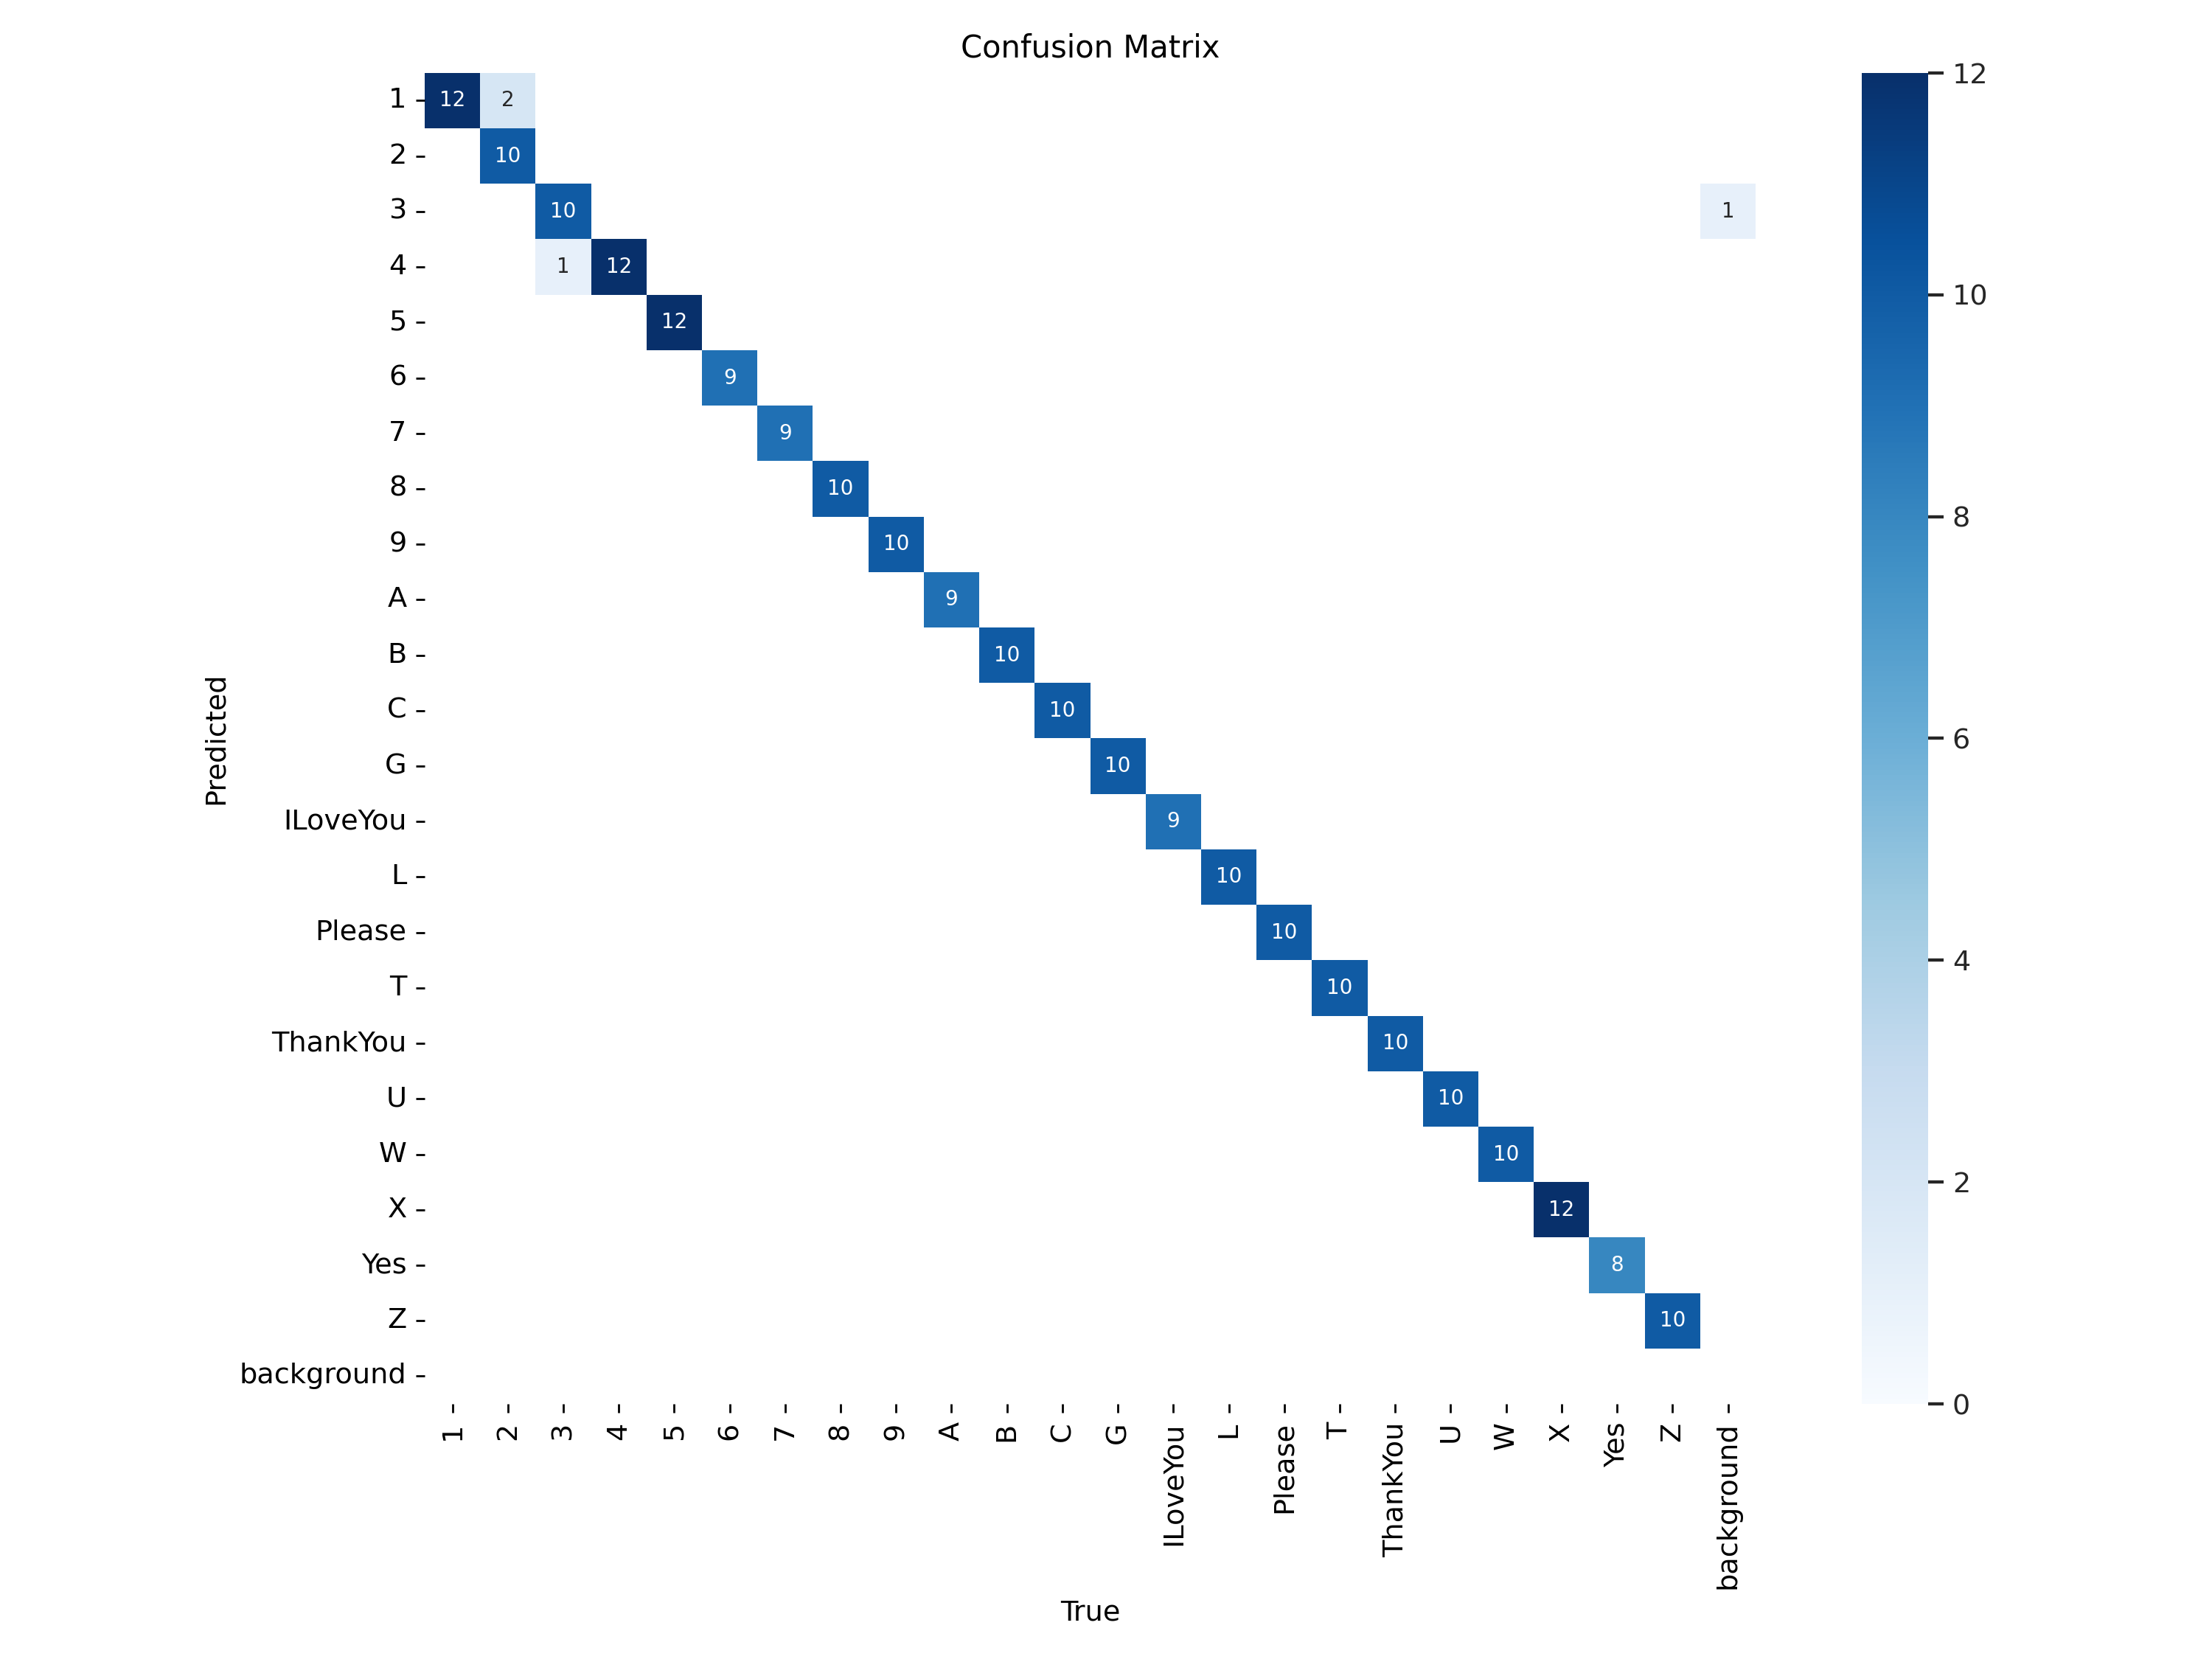

In [ ]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


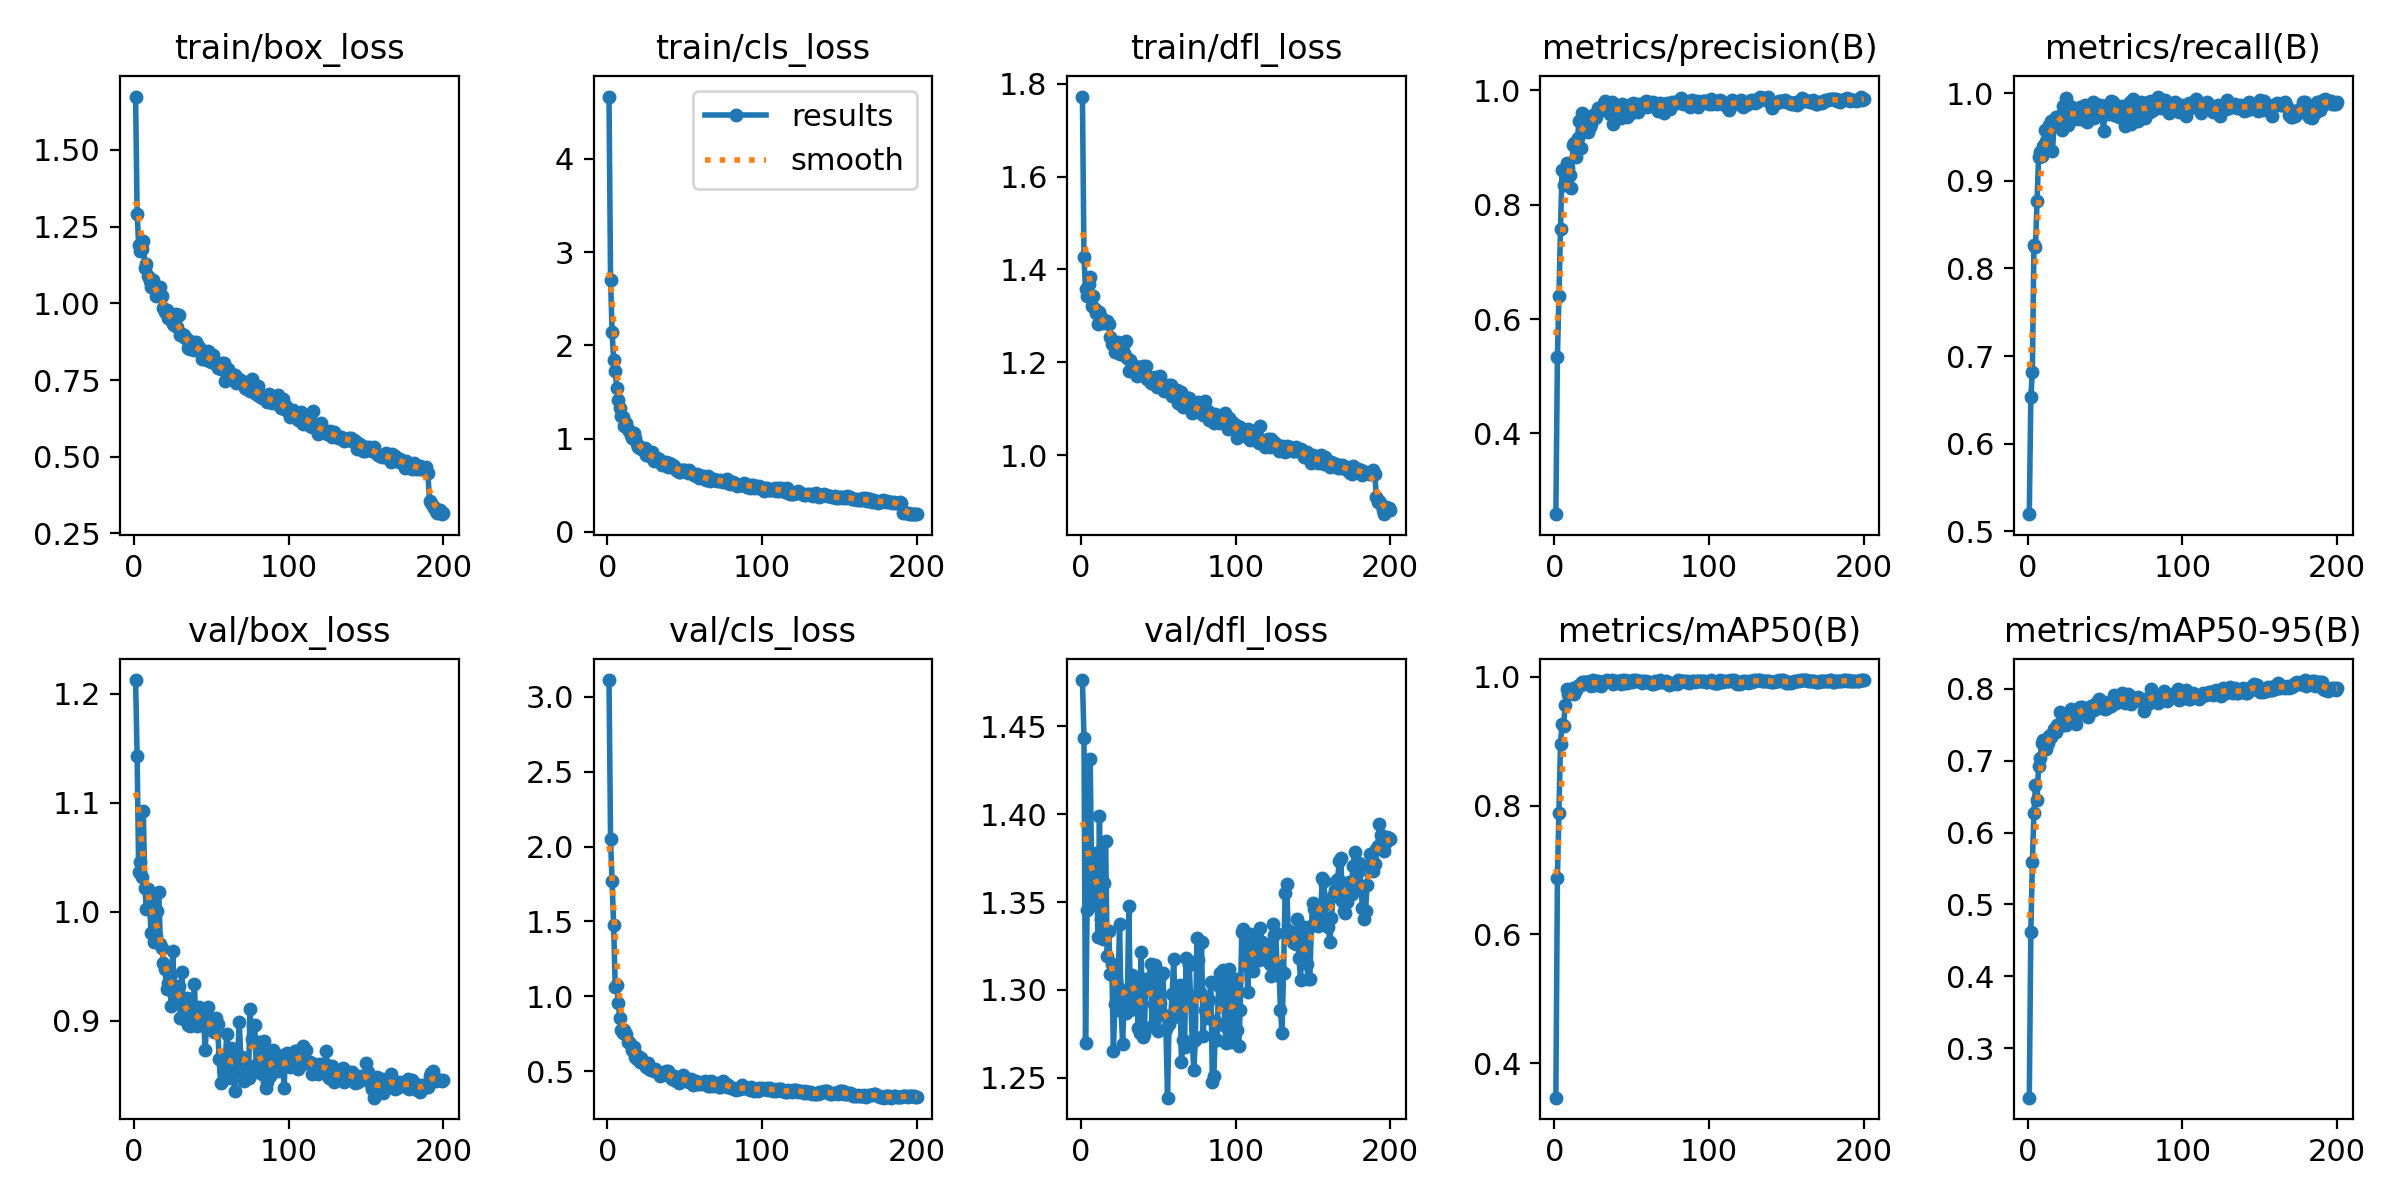

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

/content


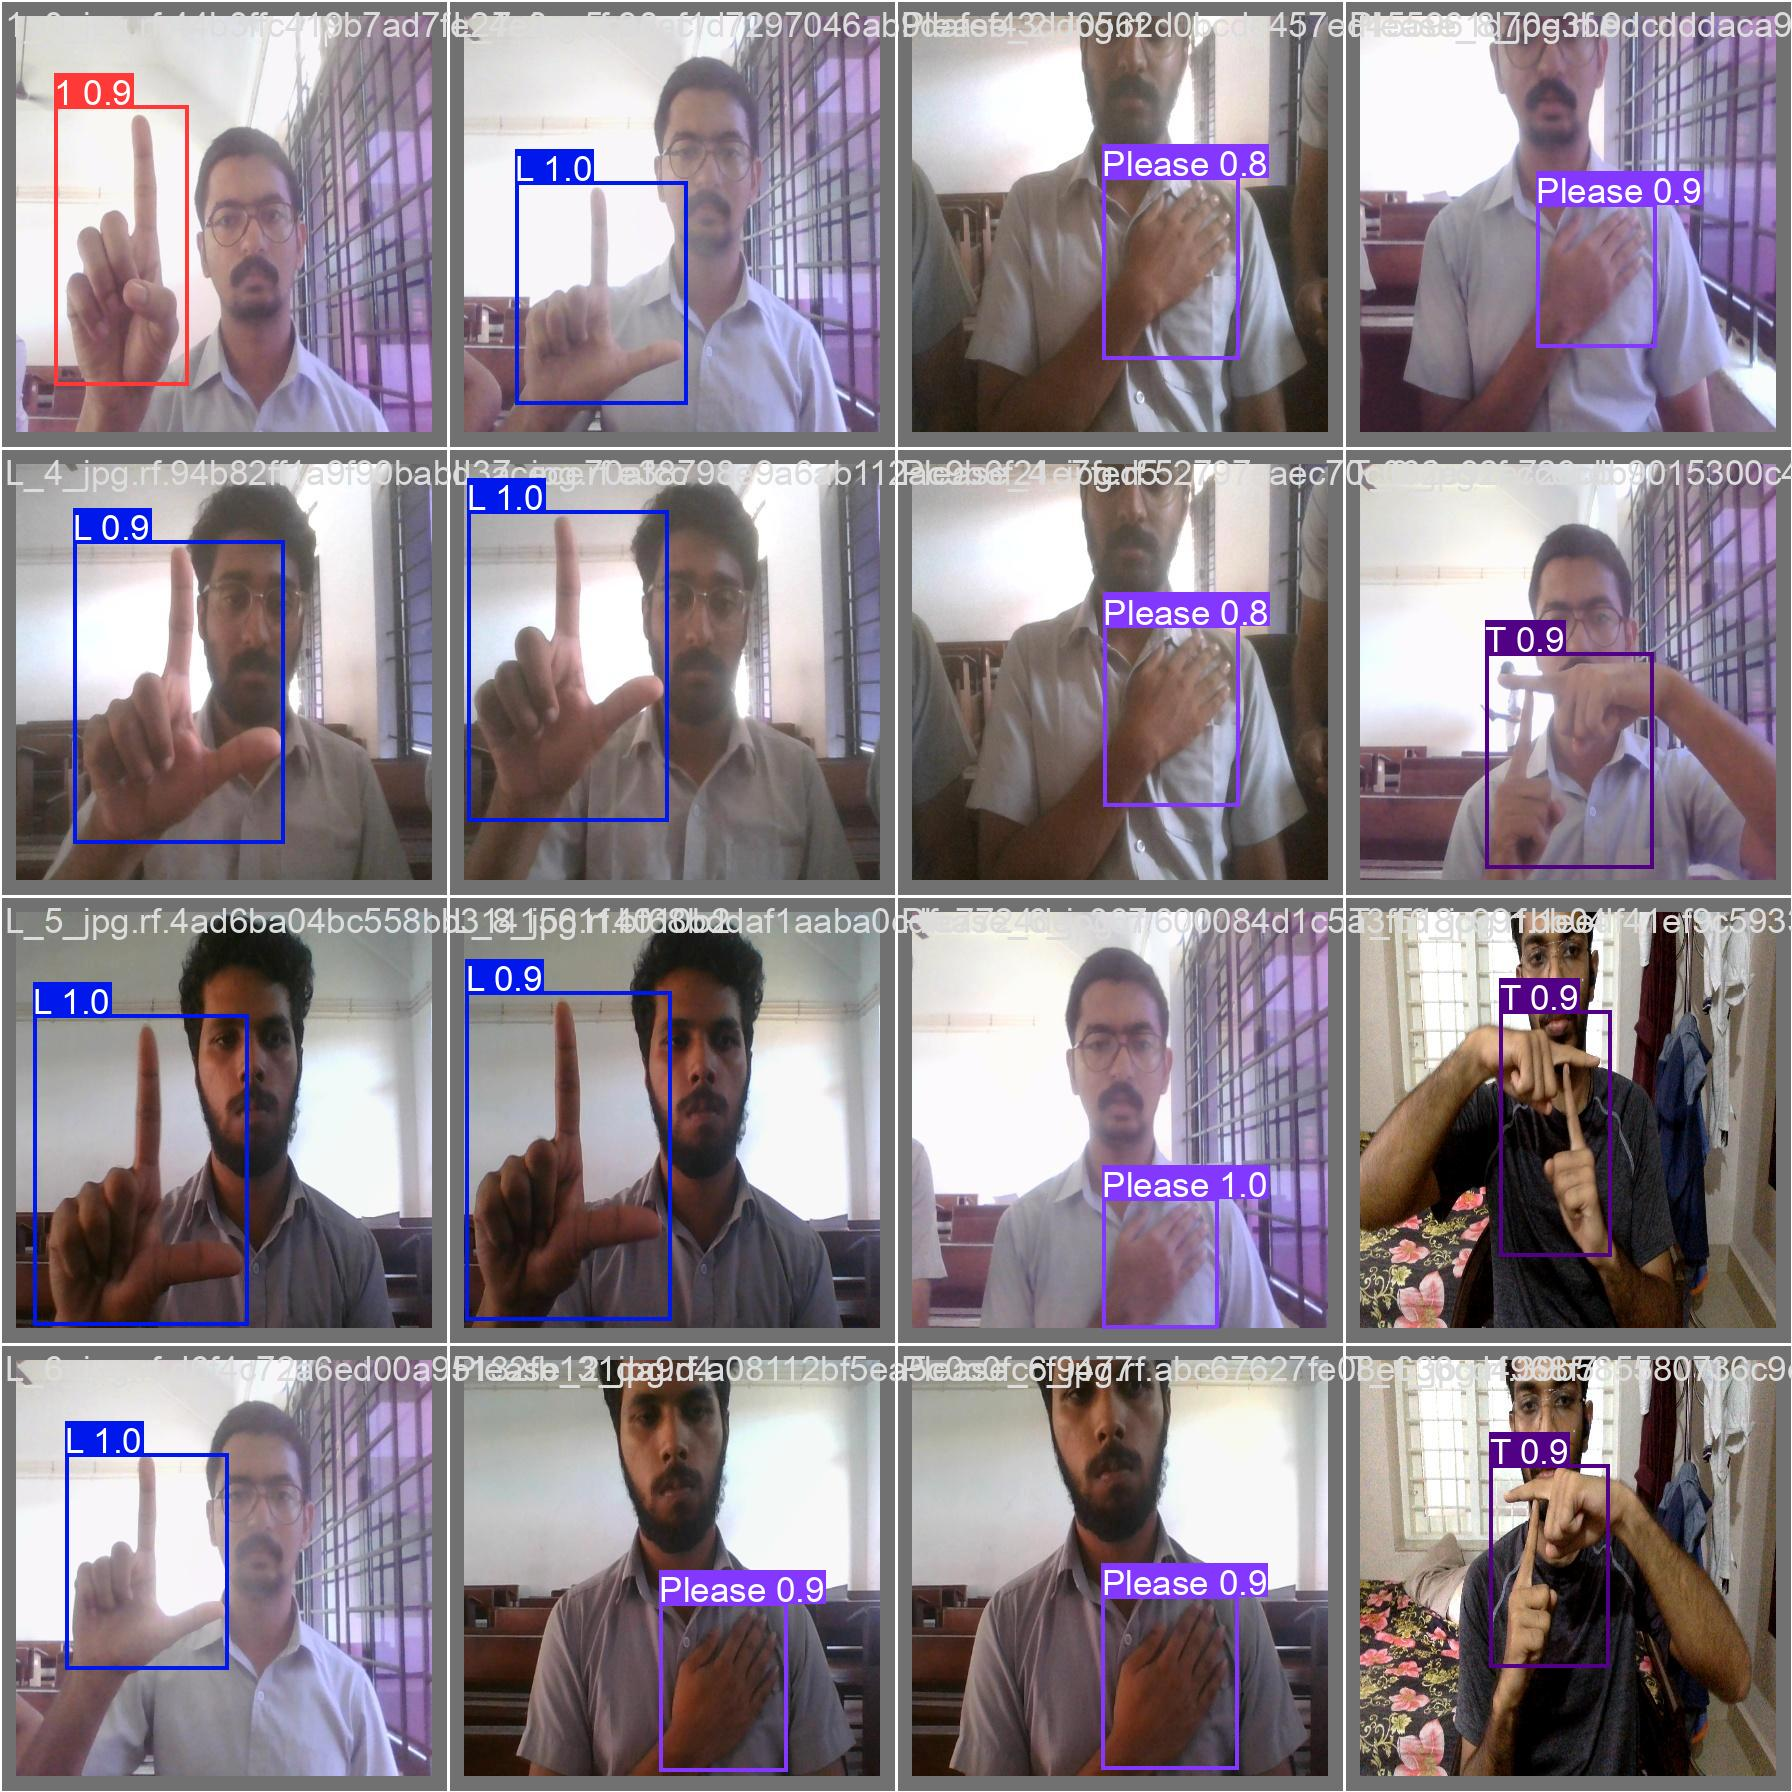

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=900)

# Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134485 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Number-only-self-dataset-5/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.13it/s]
                   all        235        235      0.985       0.99      0.995      0.813
                     1        235         12      0.855          1      0.984      0.804
                     2        235         12          1       0.85      0.995      0.745
                     3        235         11          1      0.957      0.995      0.816
                     4        235         12          1      0.959      0.995      0.802
                     5        235         12      0.991          1      0.995      0.886
             

/content


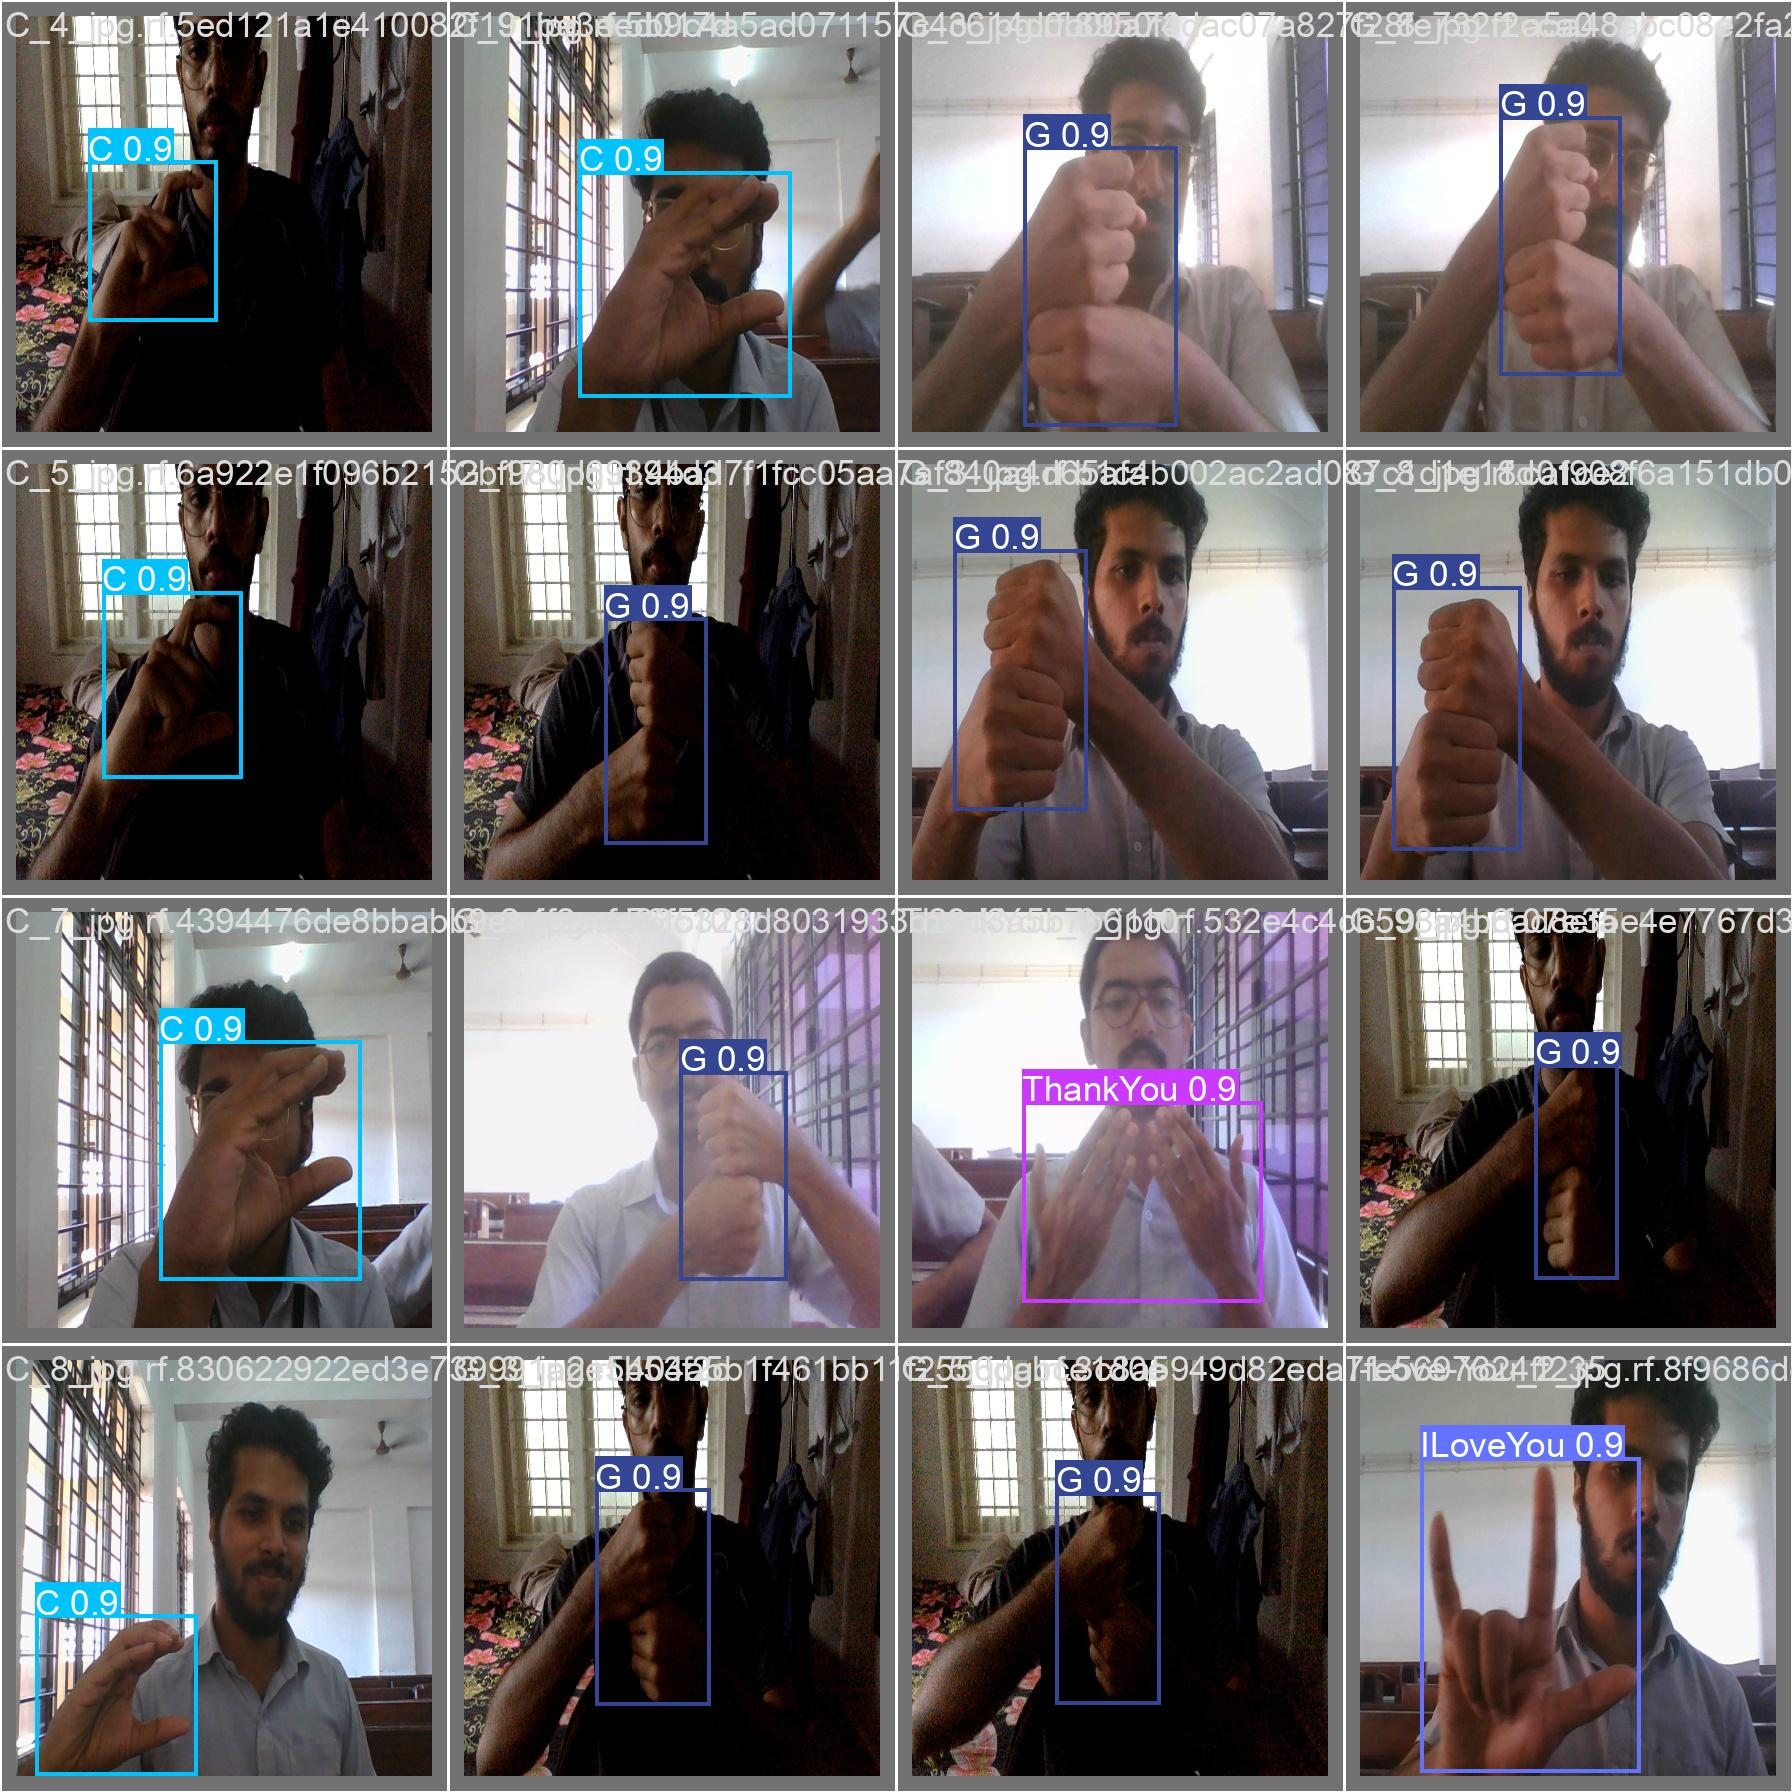

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch2_pred.jpg', width=900)

/content


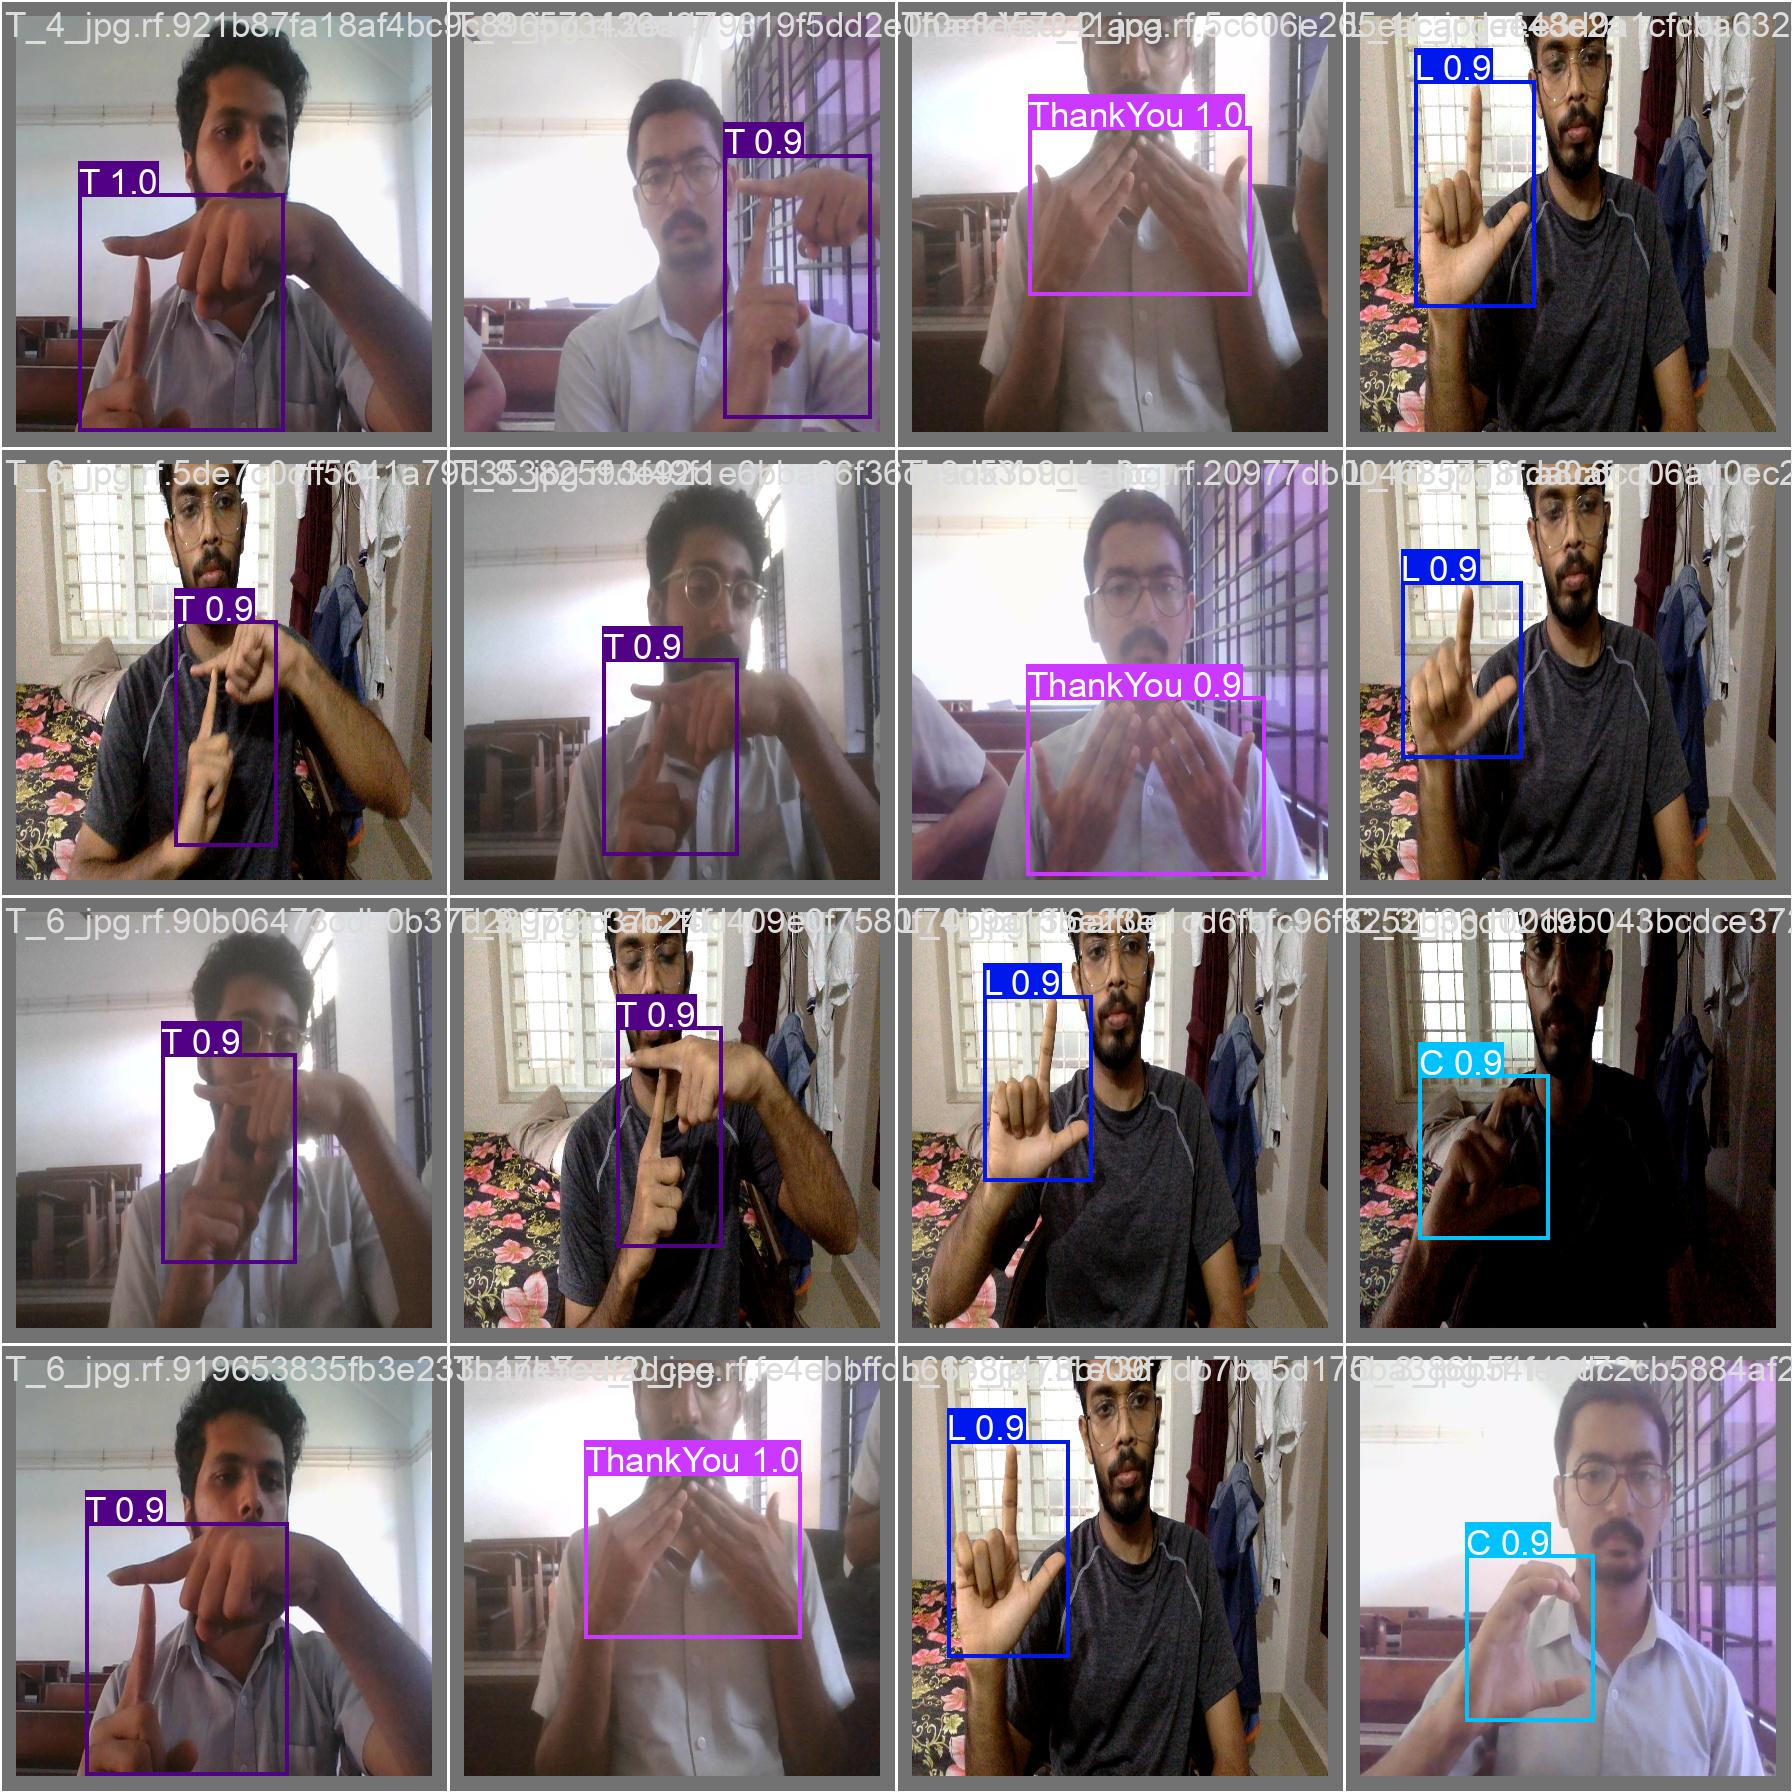

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=900)

/content


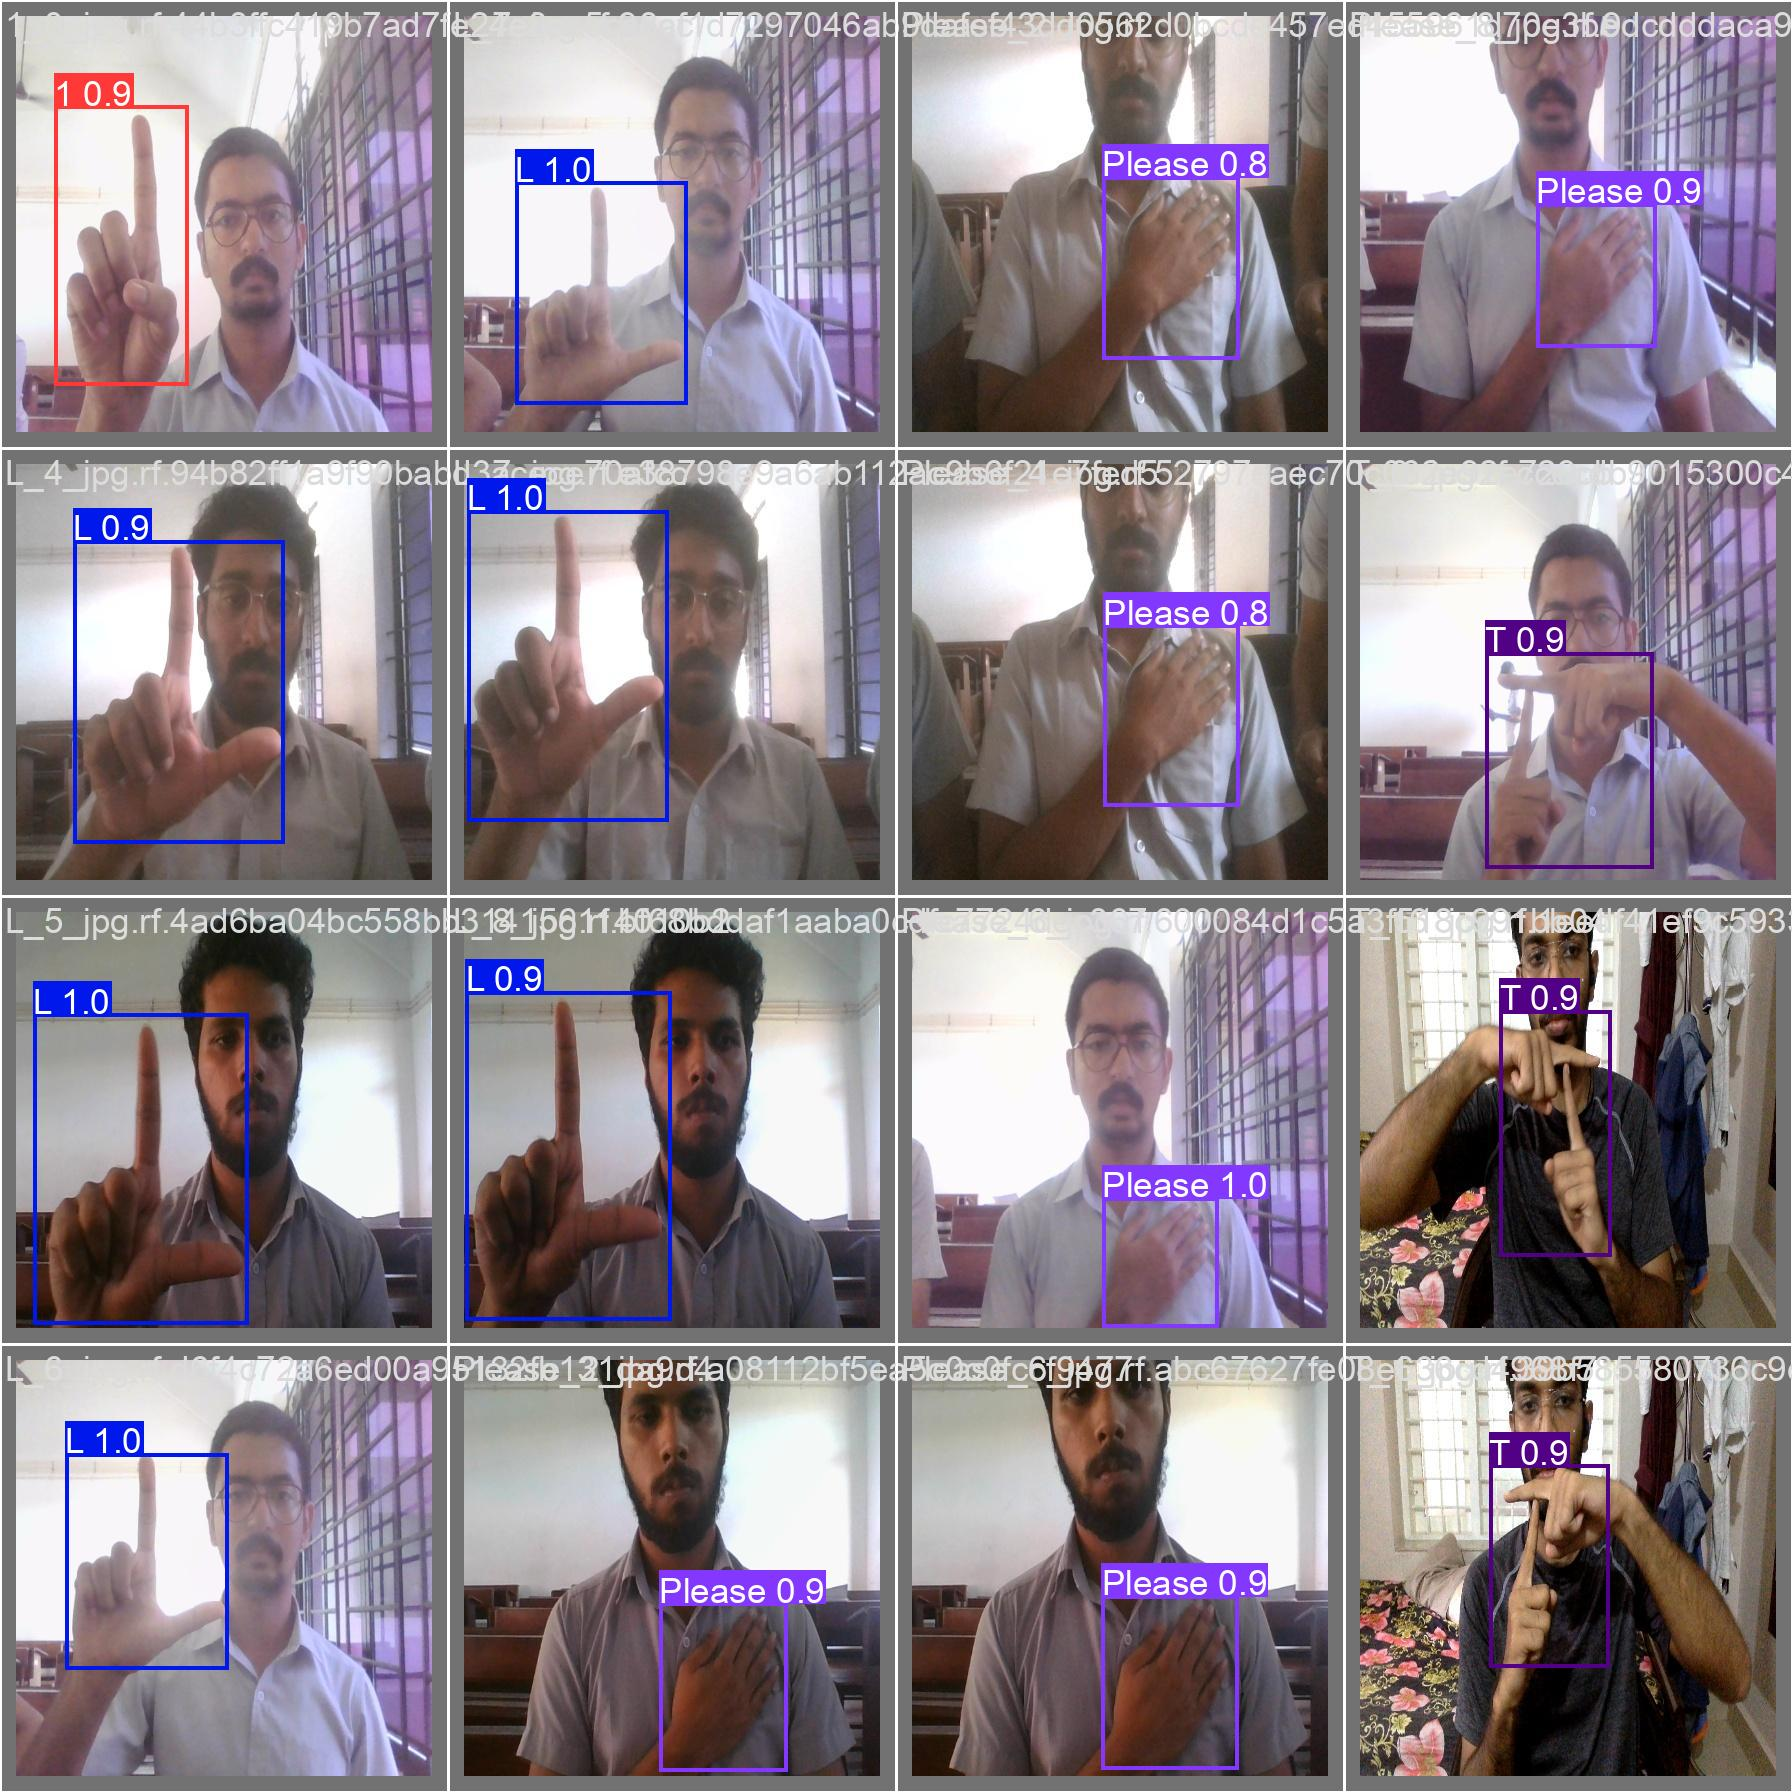

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=900)

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134485 parameters, 0 gradients, 28.5 GFLOPs

image 1/126 /content/datasets/Number-only-self-dataset-5/test/images/1_1_jpg.rf.0abbea09524de0dcf044bd14211bb759.jpg: 416x416 1 1, 10.6ms
image 2/126 /content/datasets/Number-only-self-dataset-5/test/images/1_3_jpg.rf.297642b00bba82b1d198d7a458fe68e7.jpg: 416x416 1 1, 10.3ms
image 3/126 /content/datasets/Number-only-self-dataset-5/test/images/1_3_jpg.rf.7b9dcb363b44323af4a48ab992cb7714.jpg: 416x416 1 1, 10.2ms
image 4/126 /content/datasets/Number-only-self-dataset-5/test/images/1_8_jpg.rf.9d7d5391303bbcc142b574eeb7244c2b.jpg: 416x416 1 1, 10.2ms
image 5/126 /content/datasets/Number-only-self-dataset-5/test/images/1_8_jpg.rf.b850be64e596172ddc6bf13a74c42096.jpg: 416x416 1 1, 10.2ms
image 6/126 /content/datasets/Number-only-self-dataset-5/test/images/1_9_jpg.rf.d7fa226539cdf395a5e69f4145a840c6.jpg: 416x416 1 1, 

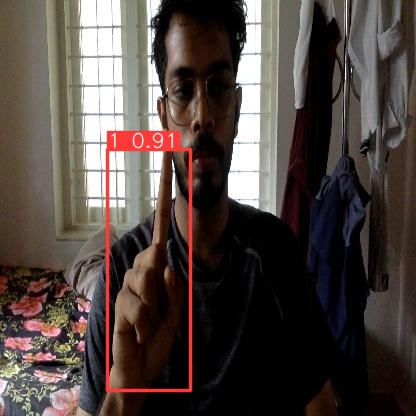

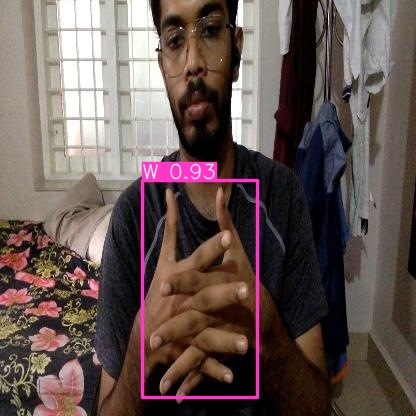

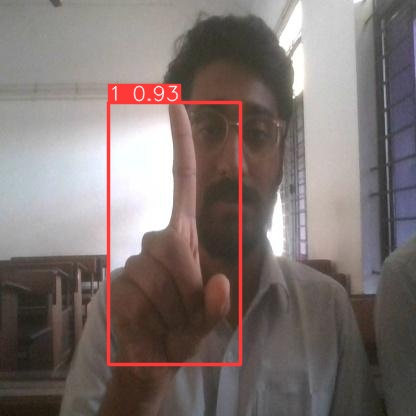

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")